# 6.1.1 K-Means Clustering

## Introduction to K-Means Clustering
K-Means Clustering is a popular unsupervised learning algorithm used to partition a dataset into `K` distinct, non-overlapping subsets (clusters). The algorithm aims to minimize the variance within each cluster, effectively grouping similar data points together.

## Explanation of K-Means Clustering
The K-Means algorithm operates through the following steps:

1. **Initialization**: Randomly select `K` initial centroids (cluster centers) from the dataset.
2. **Assignment**: Assign each data point to the nearest centroid, forming `K` clusters.
3. **Update**: Calculate the new centroids as the mean of all data points assigned to each cluster.
4. **Repeat**: Repeat the assignment and update steps until the centroids no longer change or a maximum number of iterations is reached.


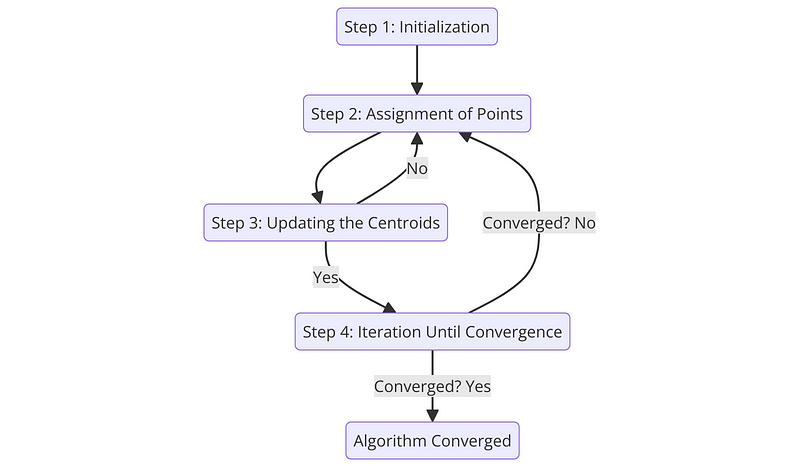

### Formulas

**Distance Calculation**: The Euclidean distance between a point $ x_i $ and a centroid $ \mu_k $ is given by:
$$ d(x_i, \mu_k) = \sqrt{\sum_{j=1}^{n} (x_{ij} - \mu_{kj})^2} $$

**Centroid Update**: The new centroid for cluster ` k ` is calculated as:
$$ \mu_k = \frac{1}{|C_k|} \sum_{x_i \in C_k} x_i $$
where  $ |C_k| $  is the number of points in cluster ` k `.


## Simple Example

Let's consider a simple example with 6 data points in a 2-dimensional space, and we want to cluster them into 2 clusters (K=2).

Data Points: $(1, 2) , (1, 4) , (1, 0) , (4, 2) , (4, 4) , (4, 0)$

**Step 1: Initialization**
- Randomly select 2 initial centroids, e.g., $(1, 2)$ and $(4, 2)$.

**Step 2: Assignment**
- Assign each data point to the nearest centroid:
  - $(1, 2)$ -> Centroid 1 $(1, 2)$
  - $(1, 4)$ -> Centroid 1 $(1, 2)$
  - $(1, 0)$ -> Centroid 1 $(1, 2)$
  - $(4, 2)$ -> Centroid 2 $(4, 2)$
  - $(4, 4)$ -> Centroid 2 $(4, 2)$
  - $(4, 0)$ -> Centroid 2 $(4, 2)$

**Step 3: Update**
- Calculate the new centroids:
  - New Centroid 1: Mean of $(1, 2), (1, 4), (1, 0)$ = $(1, 2)$
  - New Centroid 2: Mean of $(4, 2), (4, 4), (4, 0)$ = $(4, 2)$

**Step 4: Repeat**
- Repeat the assignment and update steps until the centroids no longer change. In this simple example, the centroids remain the same after the first iteration.


## Benefits and Use Cases of K-Means Clustering

**Benefits:**
- **Simplicity**: Easy to understand and implement.
- **Scalability**: Efficient with large datasets.
- **Versatility**: Applicable to various types of data and fields.

**Use Cases:**
- **Market Segmentation**: Grouping customers based on purchasing behavior.
- **Image Compression**: Reducing the number of colors in an image.
- **Anomaly Detection**: Identifying outliers in datasets.


___
___
### Readings:
- [Introduction to K-Means Clustering](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#:~:text=K%2Dmeans%20is%20a%20centroid,is%20associated%20with%20a%20centroid.)
- [The Math and Code Behind K-Means Clustering](https://readmedium.com/en/https:/towardsdatascience.com/the-math-and-code-behind-k-means-clustering-795582423666)
- [K-Means Clustering](https://readmedium.com/en/https:/medium.com/ai-made-simple/k-means-clustering-e9bd722a09fa)

___
___
### Visualizing the algorithm

![Visualization GIF](https://sandipanweb.wordpress.com/wp-content/uploads/2016/08/k3.gif)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

In [2]:
# Generate a small synthetic dataset
X, _ = make_blobs(n_samples=20, centers=2, cluster_std=1, random_state=0)

# Number of clusters
K = 2

# Initialize centroids randomly
np.random.seed(0)
centroids = X[np.random.choice(X.shape[0], K, replace=False)]
iterations = 4

In [3]:
# Function to update centroids
def update_centroids(X, labels, K):
    new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
    return new_centroids

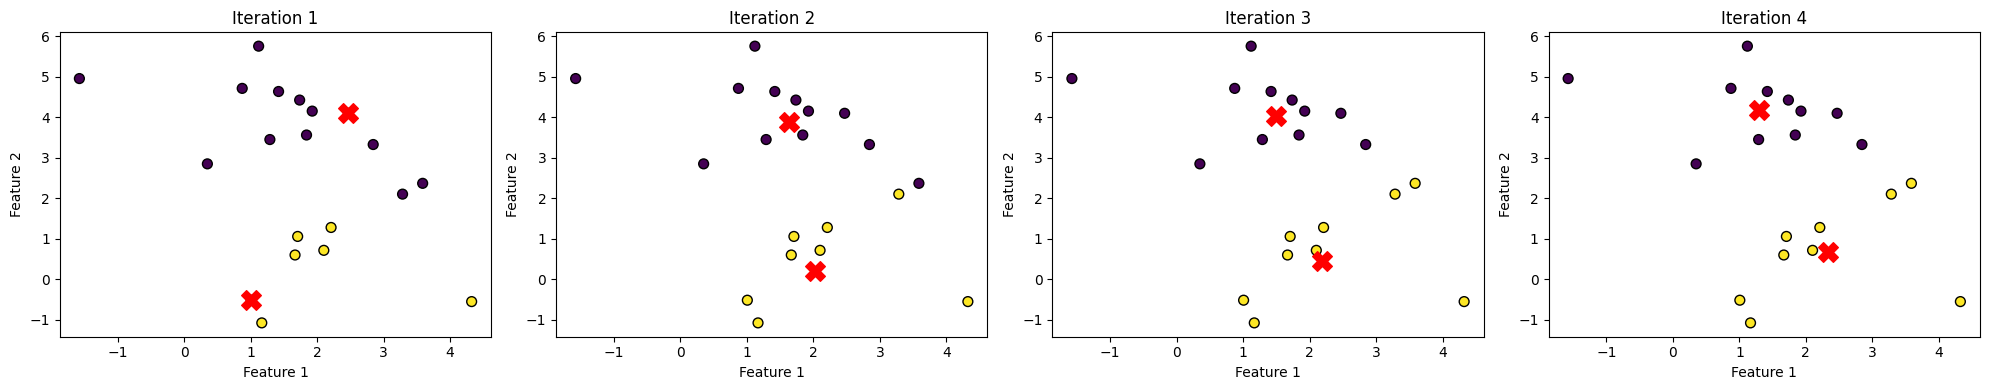

In [4]:
# Set up plotting
fig, axes = plt.subplots(1, iterations, figsize=(20, 4))
axes = axes.flatten()

for i in range(iterations):
    # Assign clusters based on current centroids
    distances = cdist(X, centroids, 'euclidean')
    labels = np.argmin(distances, axis=1)
    
    # Update centroids
    new_centroids = update_centroids(X, labels, K)
    
    # Plot the current iteration
    axes[i].scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k')
    axes[i].scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
    axes[i].set_title(f'Iteration {i+1}')
    axes[i].set_xlabel('Feature 1')
    axes[i].set_ylabel('Feature 2')
    
    # Update centroids for next iteration
    centroids = new_centroids

plt.tight_layout()
plt.show()

___
___
## KMeans using `Scikit-learn`

- Synthetic Data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [6]:
# Generating synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Initializing and fitting KMeans
kmeans = KMeans(n_clusters=4,n_init=10)
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10)

In [7]:
# Getting the cluster centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

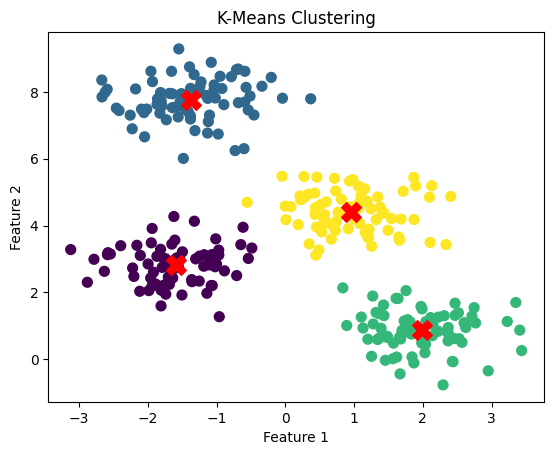

In [8]:
# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

- Iris Dataset

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [10]:
# Load the Iris dataset
iris = load_iris()
X = iris.data

In [11]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [12]:
# Apply KMeans
K = 3  # Number of clusters
kmeans = KMeans(n_clusters=K, random_state=0,n_init=10)
kmeans.fit(X_reduced)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

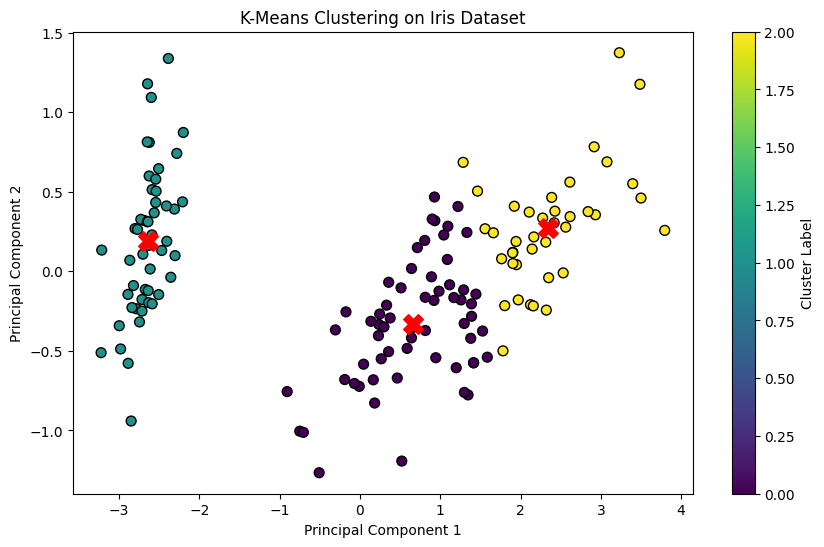

In [13]:
# Plot the clustering results
plt.figure(figsize=(10, 6))

# Plot data points
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on Iris Dataset')
plt.colorbar(scatter, label='Cluster Label')

plt.show()

In [14]:
# Evaluate clustering quality
silhouette_avg = silhouette_score(X_reduced, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_reduced, labels)
# Print evaluation metrics
print(f'Silhouette Score: {silhouette_avg:.2f}')
print(f'Calinski-Harabasz Score: {calinski_harabasz_avg:.2f}')

Silhouette Score: 0.60
Calinski-Harabasz Score: 693.71


___
___
## KMeans from Scratch

- Iris Dataset

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [16]:
# Define K-Means from scratch
class KMeansScratch:
    def __init__(self, n_clusters=3, max_iter=300, tol=1e-4, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        if random_state:
            np.random.seed(random_state)
    
    def fit(self, X):
        # Initialize centroids randomly
        self.centroids_ = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            # Assignment step
            distances = self._compute_distances(X)
            self.labels_ = np.argmin(distances, axis=1)
            
            # Update step
            new_centroids = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])
            
            # Check for convergence
            if np.all(np.linalg.norm(new_centroids - self.centroids_, axis=1) < self.tol):
                break
            
            self.centroids_ = new_centroids
    
    def _compute_distances(self, X):
        return np.linalg.norm(X[:, np.newaxis] - self.centroids_, axis=2)
    
    def predict(self, X):
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)

In [17]:
# Load the Iris dataset
iris = load_iris()
X = iris.data

In [18]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [19]:
# Apply KMeans from scratch
kmeans = KMeansScratch(n_clusters=3, random_state=0)
kmeans.fit(X_reduced)
labels = kmeans.labels_
centroids = kmeans.centroids_

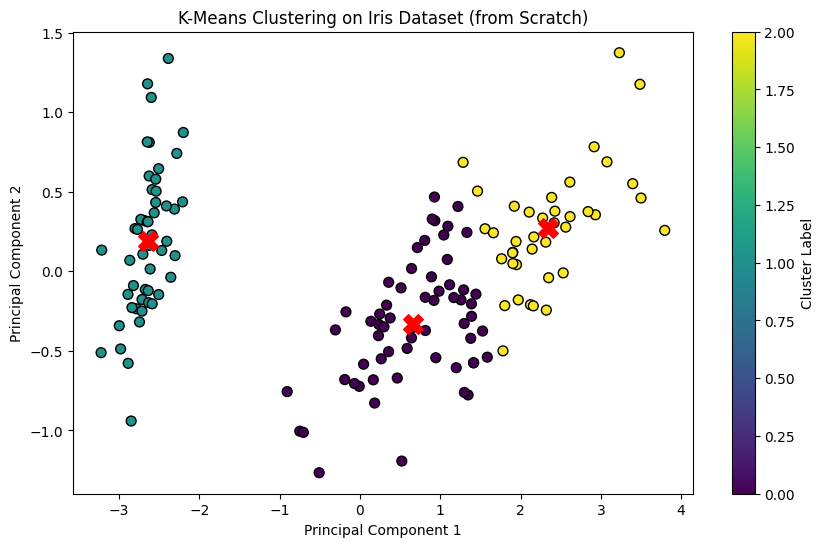

In [20]:
# Plot the clustering results
plt.figure(figsize=(10, 6))

# Plot data points
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k')

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on Iris Dataset (from Scratch)')
plt.colorbar(scatter, label='Cluster Label')

plt.show()

In [21]:
# Evaluate clustering quality
silhouette_avg = silhouette_score(X_reduced, labels)
calinski_harabasz_avg = calinski_harabasz_score(X_reduced, labels)
# Print evaluation metrics
print(f'Silhouette Score: {silhouette_avg:.2f}')
print(f'Calinski-Harabasz Score: {calinski_harabasz_avg:.2f}')

Silhouette Score: 0.60
Calinski-Harabasz Score: 693.71


## Conclusion

K-Means Clustering is a powerful tool for grouping similar data points, offering simplicity and efficiency. By understanding its underlying principles and implementation, you can effectively apply it to a variety of real-world problems.

In this notebook, we explored the K-Means clustering algorithm through various approaches and applied it to the Iris dataset.

We visualized the clustering procon a syntetic dataset in a few iterations.ers.

We utilized the `KMeans` class from the `sklearn` library to apply K-Means clustering on the Iris dataset. This implementation demonstrated the ease and efficiency of using established libraries for clustering tasks. We also evaluated the clustering performance using silhouette and Calinski-Harabasz scores, which provided insights into the quality of the clusters formed.

We implemented the K-Means algorithm from scratch to gain a deeper understanding of its underlying mechanics. This implementation included the initialization of centroids, the assignment of data points to the nearest centroids, and the iterative process of updating centroids until convergence. The from-scratch implementation provided a hands-on experience and reinforced the concepts learned from the sklearn implementation.

By visualizing and implementing K-Means clustering using different approaches, we gained a comprehensive understanding of the ang tasks.

